In [52]:
import pandas as pd
import os
import numpy as np

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    # Exclude the 'class' column for now
    #csv_data_no_class = csv_data.drop(columns=['class'])
    
    data_frames.append(csv_data)

# Step 2: Identify Highly Correlated Columns
common_highly_correlated_columns = set()

for df in data_frames:
    correlation_matrix = df.corr().abs()
    
    # Replace np.bool with bool
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    highly_correlated_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    
    print(f"Highly correlated columns in {filename}: {highly_correlated_columns}")
    
    common_highly_correlated_columns.update(set(highly_correlated_columns))

# Step 3: Print Common Highly Correlated Columns
print("Common Highly Correlated Columns (excluding 'class' column):", common_highly_correlated_columns)


KeyboardInterrupt: 

In [ ]:
len(common_highly_correlated_columns)

24

In [ ]:
import pandas as pd
import os
import numpy as np

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    # Exclude the 'class' column for now
    #csv_data_no_class = csv_data.drop(columns=['class'])
    
    data_frames.append(csv_data)

# Step 2: Identify Highly Correlated Columns
common_highly_correlated_columns = None

for idx, df in enumerate(data_frames):
    correlation_matrix = df.corr().abs()
    
    # Replace np.bool with bool
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    highly_correlated_columns = set([column for column in upper_tri.columns if any(upper_tri[column] > 0.8)])
    
    print(f"Highly correlated columns in {labels_df['filename'][idx]}: {highly_correlated_columns}")
    
    if common_highly_correlated_columns is None:
        common_highly_correlated_columns = highly_correlated_columns
    else:
        common_highly_correlated_columns = common_highly_correlated_columns.intersection(highly_correlated_columns)

# Step 3: Print Common Highly Correlated Columns
print("Common Highly Correlated Columns (excluding 'class' column):", common_highly_correlated_columns)


Highly correlated columns in user01_raw_01.csv: {'T5', 'Fp1', 'O1', 'A2', 'T4', 'T6', 'F8', 'C4', 'P4'}
Highly correlated columns in user01_raw_02.csv: {'T5', 'A1', 'Fp1', 'O2', 'O1', 'F4', 'F3', 'T6', 'F8', 'Fp2'}
Highly correlated columns in user01_raw_03.csv: {'T3', 'O1', 'F8', 'C4', 'Fp2'}
Highly correlated columns in user01_raw_04.csv: {'T5', 'T3', 'P3', 'O1', 'F8', 'F7'}
Highly correlated columns in user01_raw_05.csv: {'T5', 'A1', 'P3', 'O2', 'O1', 'A2', 'T6', 'F8'}
Highly correlated columns in user01_raw_06.csv: {'A1', 'P3', 'O2', 'A2', 'F4', 'F3', 'T6', 'F8', 'C4', 'P4'}
Highly correlated columns in user01_raw_07.csv: {'T5', 'T3', 'P3', 'O2', 'Fz', 'O1', 'T4', 'F4', 'F3', 'C4', 'C3'}
Highly correlated columns in user01_raw_08.csv: {'T3', 'P3', 'O2', 'Fz', 'F4', 'F3', 'P4'}
Highly correlated columns in user01_raw_09.csv: {'T5', 'P3', 'T4', 'A2', 'F4', 'F3', 'F7', 'Cz', 'F8', 'C4', 'Fp2'}
Highly correlated columns in user01_raw_10.csv: {'T5', 'Fz', 'O1', 'A2', 'F4', 'F3', 'F7', '

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    data_frames.append(csv_data)

# Concatenate all DataFrames into a single DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)
class_labels = merged_data['class']
merged_data = merged_data.drop(columns=['class'])

# Remove 'Time' column
merged_data = merged_data.drop(columns=['Time'])

# Remove columns with constant values
merged_data = merged_data.loc[:, (merged_data != merged_data.iloc[0]).any()]

# Remove columns with variance less than or equal to 0.001
low_variance_cols = merged_data.var()[merged_data.var() <= 0.001].index
merged_data = merged_data.drop(columns=low_variance_cols)

# Step 2: Data Preprocessing
# Perform any additional preprocessing steps as needed
# For now, let's encode the 'class' column into numerical values
merged_data['class'] = class_labels

label_encoder = LabelEncoder()
merged_data['class'] = label_encoder.fit_transform(merged_data['class'])

# Split Data
X = merged_data.drop(columns=['class'])
y = merged_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")

# Train a Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    data_frames.append(csv_data)

# Concatenate all DataFrames into a single DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)
class_labels = merged_data['class']
merged_data = merged_data.drop(columns=['class'])

# Remove 'Time' column
merged_data = merged_data.drop(columns=['Time'])

# Remove columns with constant values
merged_data = merged_data.loc[:, (merged_data != merged_data.iloc[0]).any()]

# Remove columns with variance less than or equal to 0.001
low_variance_cols = merged_data.var()[merged_data.var() <= 0.001].index
merged_data = merged_data.drop(columns=low_variance_cols)

# Step 2: Data Preprocessing
# Scale features (excluding 'class' column)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.drop(columns=['class']))
scaled_df = pd.DataFrame(scaled_features, columns=merged_data.columns[:-1])  # Exclude 'class' column

# Concatenate scaled features with 'class' column
merged_data_scaled = pd.concat([scaled_df, class_labels], axis=1)

label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")

# Train a Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance without specifying any hyperparameters
classifier = RandomForestClassifier()

# Access the default hyperparameters
default_max_depth = classifier.get_params()['max_depth']

print("Default max_depth:", default_max_depth)

Default max_depth: None


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

# Step 1.1: Initialize StandardScaler
scaler = StandardScaler()

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    
    # Step 1.2: Scale features (excluding 'class' column) for each csv_data
    scaled_features = scaler.fit_transform(csv_data.drop(columns=['class']))
    scaled_df = pd.DataFrame(scaled_features, columns=csv_data.columns[:-1])  # Exclude 'class' column
    
    # Step 1.3: Concatenate scaled features with 'class' column for each csv_data
    csv_data_scaled = pd.concat([scaled_df, csv_data['class']], axis=1)
    
    data_frames.append(csv_data_scaled)

# Step 1.4: Concatenate all DataFrames into a single DataFrame
merged_data_scaled = pd.concat(data_frames, ignore_index=True)
# Remove 'Time' column
merged_data_scaled = merged_data_scaled.drop(columns=['Time'])

# Remove columns with constant values
merged_data_scaled = merged_data_scaled.loc[:, (merged_data_scaled != merged_data_scaled.iloc[0]).any()]



# Step 2: Data Preprocessing
label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")
# Train a Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Data preprocessed
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     54005
           1       0.99      0.99      0.99     54190
           2       0.99      0.99      0.99     54372
           3       0.98      0.99      0.99     53698
           4       0.98      0.99      0.99     53953
           5       0.99      0.99      0.99     53782

    accuracy                           0.99    324000
   macro avg       0.99      0.99      0.99    324000
weighted avg       0.99      0.99      0.99    324000



In [ ]:
import os
import pandas as pd
from statistics import mode
from sklearn.preprocessing import LabelEncoder

# Assuming 'classifier' is the trained classifier

# Specify the folder containing the CSV files for prediction
folder_path = "validation"

# Initialize lists to store filenames and predicted classes
file_names = []
predicted_classes = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # Load the CSV file
        file_path = os.path.join(folder_path, file_name)
        try:
            csv_data = pd.read_csv(file_path)
            csv_data=csv_data.drop(columns=['Time'])
            # Make predictions using the trained model
            predictions = classifier.predict(csv_data)
            
            # Get the most frequent class using the mode function
            most_frequent_class = mode(predictions)
            
            # Append filename and predicted class to the lists
            file_names.append(file_name)
            predicted_classes.append(most_frequent_class)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Reverse the encoded class numbers to original labels
# Assuming 'label_encoder' is the LabelEncoder used during training
original_labels = label_encoder.inverse_transform(predicted_classes)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'filename': file_names, 'predicted_class': original_labels})

# Save the DataFrame to a new CSV file (submission.csv)
submission_df.to_csv("submission3.csv", index=False)

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

# Step 1.1: Initialize StandardScaler
scaler = StandardScaler()

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    
    # Step 1.2: Scale features (excluding 'class' column) for each csv_data
    scaled_features = scaler.fit_transform(csv_data.drop(columns=['class']))
    scaled_df = pd.DataFrame(scaled_features, columns=csv_data.columns[:-1])  # Exclude 'class' column
    
    # Step 1.3: Concatenate scaled features with 'class' column for each csv_data
    csv_data_scaled = pd.concat([scaled_df, csv_data['class']], axis=1)
    
    data_frames.append(csv_data_scaled)

# Step 1.4: Concatenate all DataFrames into a single DataFrame
merged_data_scaled = pd.concat(data_frames, ignore_index=True)
# Remove 'Time' column
merged_data_scaled = merged_data_scaled.drop(columns=['Time'])

# Remove columns with constant values
merged_data_scaled = merged_data_scaled.loc[:, (merged_data_scaled != merged_data_scaled.iloc[0]).any()]



# Step 2: Data Preprocessing
label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")
# Train a Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=20)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Data preprocessed
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     54005
           1       0.98      0.97      0.97     54190
           2       0.98      0.97      0.98     54372
           3       0.96      0.98      0.97     53698
           4       0.96      0.98      0.97     53953
           5       0.98      0.97      0.97     53782

    accuracy                           0.97    324000
   macro avg       0.97      0.97      0.97    324000
weighted avg       0.97      0.97      0.97    324000



In [ ]:
import os
import pandas as pd
from statistics import mode
from sklearn.preprocessing import LabelEncoder

# Assuming 'classifier' is the trained classifier

# Specify the folder containing the CSV files for prediction
folder_path = "validation"

# Initialize lists to store filenames and predicted classes
file_names = []
predicted_classes = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # Load the CSV file
        file_path = os.path.join(folder_path, file_name)
        try:
            csv_data = pd.read_csv(file_path)
            csv_data=csv_data.drop(columns=['Time'])
            # Make predictions using the trained model
            predictions = classifier.predict(csv_data)
            
            # Get the most frequent class using the mode function
            most_frequent_class = mode(predictions)
            
            # Append filename and predicted class to the lists
            file_names.append(file_name)
            predicted_classes.append(most_frequent_class)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Reverse the encoded class numbers to original labels
# Assuming 'label_encoder' is the LabelEncoder used during training
original_labels = label_encoder.inverse_transform(predicted_classes)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'filename': file_names, 'predicted_class': original_labels})

# Save the DataFrame to a new CSV file (submission.csv)
submission_df.to_csv("submission3.csv", index=False)

# xgboost

In [ ]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB 1.4 MB/s eta 0:01:14
                                             0.1/99.8 MB 825.8 kB/s eta 0:02:01
                                              0.1/99.8 MB 1.3 MB/s eta 0:01:16
                                              0.2/99.8 MB 1.7 MB/s eta 0:01:00
                                              0.3/99.8 MB 1.5 MB/s eta 0:01:08
                                              0.4/99.8 MB 1.8 MB/s eta 0:00:57
                                              0.5/99.8 MB 1.9 MB/s eta 0:00:54
                                              0.6/99.8 MB 1.9 MB/s eta 0:00:53
                                              0.7/99.8 MB 1.7 MB/s eta 0:01:00
                                              0.8/99.8 MB 1.9 MB/s eta 0:00:52
                                              1.0/99.8 MB 2


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

# Step 1.1: Initialize StandardScaler
scaler = StandardScaler()

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    
    # Step 1.2: Scale features (excluding 'class' column) for each csv_data
    scaled_features = scaler.fit_transform(csv_data.drop(columns=['class']))
    scaled_df = pd.DataFrame(scaled_features, columns=csv_data.columns[:-1])  # Exclude 'class' column
    
    # Step 1.3: Concatenate scaled features with 'class' column for each csv_data
    csv_data_scaled = pd.concat([scaled_df, csv_data['class']], axis=1)
    
    data_frames.append(csv_data_scaled)

# Step 1.4: Concatenate all DataFrames into a single DataFrame
merged_data_scaled = pd.concat(data_frames, ignore_index=True)
# Remove 'Time' column
merged_data_scaled = merged_data_scaled.drop(columns=['Time'])

# Remove columns with constant values
merged_data_scaled = merged_data_scaled.loc[:, (merged_data_scaled != merged_data_scaled.iloc[0]).any()]

# Step 2: Data Preprocessing
label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")

# Train a Classifier (XGBoost)
classifier = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Data preprocessed
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     54005
           1       0.95      0.94      0.95     54190
           2       0.95      0.95      0.95     54372
           3       0.95      0.95      0.95     53698
           4       0.94      0.95      0.95     53953
           5       0.95      0.95      0.95     53782

    accuracy                           0.95    324000
   macro avg       0.95      0.95      0.95    324000
weighted avg       0.95      0.95      0.95    324000



In [ ]:
import os
import pandas as pd
from statistics import mode
from sklearn.preprocessing import LabelEncoder

# Assuming 'classifier' is the trained classifier

# Specify the folder containing the CSV files for prediction
folder_path = "validation"

# Initialize lists to store filenames and predicted classes
file_names = []
predicted_classes = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # Load the CSV file
        file_path = os.path.join(folder_path, file_name)
        try:
            csv_data = pd.read_csv(file_path)
            csv_data=csv_data.drop(columns=['Time'])
            # Make predictions using the trained model
            predictions = classifier.predict(csv_data)
            
            # Get the most frequent class using the mode function
            most_frequent_class = mode(predictions)
            
            # Append filename and predicted class to the lists
            file_names.append(file_name)
            predicted_classes.append(most_frequent_class)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Reverse the encoded class numbers to original labels
# Assuming 'label_encoder' is the LabelEncoder used during training
original_labels = label_encoder.inverse_transform(predicted_classes)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'filename': file_names, 'predicted_class': original_labels})

# Save the DataFrame to a new CSV file (submission.csv)
submission_df.to_csv("submission3.csv", index=False)

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

# Initialize StandardScaler
scaler = StandardScaler()

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    
    # Scale features (excluding 'class' column) for each csv_data
    scaled_features = scaler.fit_transform(csv_data.drop(columns=['class']))
    scaled_df = pd.DataFrame(scaled_features, columns=csv_data.columns[:-1])  # Exclude 'class' column
    
    # Concatenate scaled features with 'class' column for each csv_data
    csv_data_scaled = pd.concat([scaled_df, csv_data['class']], axis=1)
    
    data_frames.append(csv_data_scaled)

# Concatenate all DataFrames into a single DataFrame
merged_data_scaled = pd.concat(data_frames, ignore_index=True)
# Remove 'Time' column
merged_data_scaled = merged_data_scaled.drop(columns=['Time'])

# Remove columns with constant values
merged_data_scaled = merged_data_scaled.loc[:, (merged_data_scaled != merged_data_scaled.iloc[0]).any()]

# Data Preprocessing
label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost classifier
xgb = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the Model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Best Parameters: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54005
           1       1.00      1.00      1.00     54190
           2       1.00      1.00      1.00     54372
           3       1.00      1.00      1.00     53698
           4       0.99      1.00      1.00     53953
           5       1.00      1.00      1.00     53782

    accuracy                           1.00    324000
   macro avg       1.00      1.00      1.00    324000
weighted avg       1.00      1.00      1.00    324000



In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Data
labels_df = pd.read_csv("train_labels.csv")
data_frames = []

# Initialize StandardScaler
scaler = StandardScaler()

for index, row in labels_df.iterrows():
    filename = row['filename']
    class_label = row['class']
    
    file_path = os.path.join("train", filename)
    csv_data = pd.read_csv(file_path)
    
    csv_data['class'] = class_label
    
    # Scale features (excluding 'class' column) for each csv_data
    scaled_features = scaler.fit_transform(csv_data.drop(columns=['class']))
    scaled_df = pd.DataFrame(scaled_features, columns=csv_data.columns[:-1])  # Exclude 'class' column
    
    # Concatenate scaled features with 'class' column for each csv_data
    csv_data_scaled = pd.concat([scaled_df, csv_data['class']], axis=1)
    
    data_frames.append(csv_data_scaled)

# Concatenate all DataFrames into a single DataFrame
merged_data_scaled = pd.concat(data_frames, ignore_index=True)
# Remove 'Time' column
merged_data_scaled = merged_data_scaled.drop(columns=['Time'])

# Remove columns with constant values
merged_data_scaled = merged_data_scaled.loc[:, (merged_data_scaled != merged_data_scaled.iloc[0]).any()]

# Data Preprocessing
label_encoder = LabelEncoder()
merged_data_scaled['class'] = label_encoder.fit_transform(merged_data_scaled['class'])

# Split Data
X = merged_data_scaled.drop(columns=['class'])
y = merged_data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed")

# Train a Classifier (XGBoost) with Best Hyperparameters
classifier = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_),
                           n_estimators=150, max_depth=9, learning_rate=0.2, subsample=1.0, colsample_bytree=0.9,
                           random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Data preprocessed
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54005
           1       1.00      1.00      1.00     54190
           2       1.00      1.00      1.00     54372
           3       1.00      1.00      1.00     53698
           4       0.99      1.00      1.00     53953
           5       1.00      1.00      1.00     53782

    accuracy                           1.00    324000
   macro avg       1.00      1.00      1.00    324000
weighted avg       1.00      1.00      1.00    324000



In [ ]:
import os
import pandas as pd
from statistics import mode
from sklearn.preprocessing import LabelEncoder

# Assuming 'classifier' is the trained classifier

# Specify the folder containing the CSV files for prediction
folder_path = "validation"

# Initialize lists to store filenames and predicted classes
file_names = []
predicted_classes = []

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        # Load the CSV file
        file_path = os.path.join(folder_path, file_name)
        try:
            csv_data = pd.read_csv(file_path)
            csv_data=csv_data.drop(columns=['Time'])
            # Make predictions using the trained model
            predictions = classifier.predict(csv_data)
            
            # Get the most frequent class using the mode function
            most_frequent_class = mode(predictions)
            
            # Append filename and predicted class to the lists
            file_names.append(file_name)
            predicted_classes.append(most_frequent_class)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Reverse the encoded class numbers to original labels
# Assuming 'label_encoder' is the LabelEncoder used during training
original_labels = label_encoder.inverse_transform(predicted_classes)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'filename': file_names, 'predicted_class': original_labels})

# Save the DataFrame to a new CSV file (submission.csv)
submission_df.to_csv("submission3.csv", index=False)

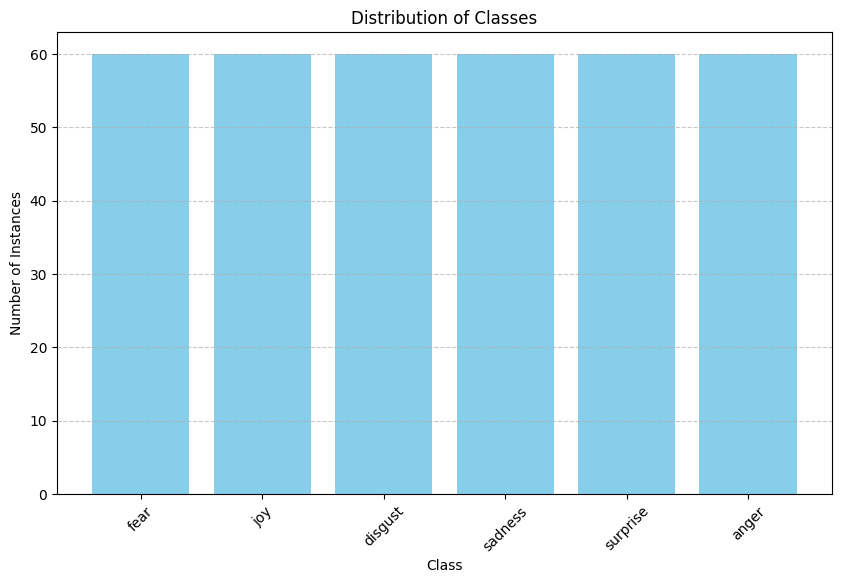

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'train_labels.csv'
df = pd.read_csv(csv_file_path)

# Assuming 'class' is the column name containing class labels
class_counts = df['class'].value_counts()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import os

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'train_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('train', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    
    # Calculate the mean of each column
    mean_values = df.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_data.csv', index=False)



In [ ]:
import pandas as pd
import os
import numpy as np
from scipy.spatial.distance import cdist

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Calculate distances between mean values of test data and compressed data
    distances = cdist(mean_values_test, compressed_df.iloc[:, :-1], metric='euclidean')
    
    # Find the index of the closest row in the compressed data
    closest_index = np.argmin(distances)
    
    # Assign emotion label based on the closest match
    emotion_label = compressed_df.loc[closest_index, 'label']
    
    # Assign emotion label to test CSV file
    print(f"Test file: {test_file}, Assigned emotion: {emotion_label}")
    # Optionally, you can write the emotion label to a new CSV file or store it in a dictionary for further analysis


Test file: user02_raw_01.csv, Assigned emotion: sadness
Test file: user02_raw_02.csv, Assigned emotion: surprise
Test file: user02_raw_03.csv, Assigned emotion: joy
Test file: user02_raw_04.csv, Assigned emotion: joy
Test file: user02_raw_05.csv, Assigned emotion: fear
Test file: user02_raw_06.csv, Assigned emotion: fear
Test file: user02_raw_07.csv, Assigned emotion: sadness
Test file: user02_raw_08.csv, Assigned emotion: anger
Test file: user02_raw_09.csv, Assigned emotion: anger
Test file: user02_raw_10.csv, Assigned emotion: anger
Test file: user02_raw_11.csv, Assigned emotion: anger
Test file: user02_raw_12.csv, Assigned emotion: anger
Test file: user02_raw_13.csv, Assigned emotion: anger
Test file: user02_raw_14.csv, Assigned emotion: surprise
Test file: user02_raw_15.csv, Assigned emotion: surprise
Test file: user02_raw_16.csv, Assigned emotion: joy
Test file: user02_raw_17.csv, Assigned emotion: surprise
Test file: user02_raw_18.csv, Assigned emotion: fear
Test file: user04_raw

In [ ]:
import pandas as pd
import os
import numpy as np
from scipy.spatial.distance import cdist

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Calculate distances between mean values of test data and compressed data
    distances = cdist(mean_values_test, compressed_df.iloc[:, :-1], metric='euclidean')
    
    # Find the index of the closest row in the compressed data
    closest_index = np.argmin(distances)
    
    # Assign emotion label based on the closest match
    emotion_label = compressed_df.loc[closest_index, 'label']
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)

In [ ]:
import pandas as pd
import os
import numpy as np
from scipy.spatial.distance import cdist

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    df_test=df_test-df_test.mean()
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Calculate distances between mean values of test data and compressed data
    distances = cdist(mean_values_test, compressed_df.iloc[:, :-1], metric='euclidean')
    
    # Find the index of the closest row in the compressed data
    closest_index = np.argmin(distances)
    
    # Assign emotion label based on the closest match
    emotion_label = compressed_df.loc[closest_index, 'label']
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)


## knn

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    df_test = df_test - df_test.mean()
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Fit a k-nearest neighbors model
    knn = NearestNeighbors(n_neighbors=4, metric='euclidean')
    knn.fit(compressed_df.iloc[:, :-1])  # Fit on the compressed data
    
    # Find the k nearest neighbors
    _, indices = knn.kneighbors(mean_values_test)
    
    # Get the labels of the k nearest neighbors
    neighbor_labels = compressed_df.iloc[indices[0], -1]
    
    # Assign emotion label based on the majority class among the k neighbors
    emotion_label = neighbor_labels.mode()[0]
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.w

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Calculate cosine similarity between mean values of test data and compressed data
    similarities = cosine_similarity(mean_values_test, compressed_df.iloc[:, :-1])
    
    # Find the index of the closest row in the compressed data
    closest_index = np.argmax(similarities)
    
    # Assign emotion label based on the closest match
    emotion_label = compressed_df.loc[closest_index, 'label']
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)


# standard deviation normalization

In [78]:
import pandas as pd
import os

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'train_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('train', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    std_values = df.std()
    std_values[std_values == 0] = 1
    # Center the data about its mean
    df_centered = (df - df.mean())/std_values
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_data.csv', index=False)


In [94]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    std_values = df_test.std()
    std_values[std_values == 0] = 1
    df_test = (df_test - df_test.mean())/std_values
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Fit a k-nearest neighbors model
    knn = NearestNeighbors(n_neighbors=32, metric='euclidean')
    knn.fit(compressed_df.iloc[:, :-1])  # Fit on the compressed data
    
    # Find the k nearest neighbors
    _, indices = knn.kneighbors(mean_values_test)
    
    # Get the labels of the k nearest neighbors
    neighbor_labels = compressed_df.iloc[indices[0], -1]
    
    # Assign emotion label based on the majority class among the k neighbors
    emotion_label = neighbor_labels.mode()[0]
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)

C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.w

# random forest + compression

In [60]:
import pandas as pd
import os

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'train_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('train', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    std_values = df.std()
    std_values[std_values == 0] = 1
    # Center the data about its mean
    df_centered = (df - df.mean())
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_data.csv', index=False)

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Load compressed data
compressed_data_path = 'compressed_data.csv'
compressed_df = pd.read_csv(compressed_data_path)

# Split data into features and target
X = compressed_df.drop(columns=['label'])
y = compressed_df['label']

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Step 2: Save the trained model
model_path = 'random_forest_model.joblib'
joblib.dump(clf, model_path)




['random_forest_model.joblib']

In [62]:
# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []
compressed_test_data = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    std_values = df_test.std()
    std_values[std_values == 0] = 1
    # Center the data about its mean
    df_centered = (df_test - df_test.mean())
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    #mean_values.append(label)
    
    # Append to compressed_data list
    compressed_test_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values))]
compressed_test_df = pd.DataFrame(compressed_test_data, columns=columns)

# Write to CSV file
compressed_test_df.to_csv('compressed_test_data.csv', index=False)

In [63]:
import pandas as pd
import joblib

# Load the saved model
model_path = 'random_forest_model.joblib'
clf = joblib.load(model_path)

# Load the compressed test data
compressed_test_data_path = 'compressed_test_data.csv'
compressed_test_df = pd.read_csv(compressed_test_data_path)

# Predict output for each row in the compressed test data
predictions = clf.predict(compressed_test_df)

# Assuming predictions are a list of predicted classes
# You can do further processing with these predictions as needed
print(predictions)


['sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness' 'sadness'
 'sadn

TypeError: len() takes exactly one argument (0 given)

In [59]:
print(len(predictions))

180


# min max scaling

In [76]:
import pandas as pd
import os
from sklearn.preprocessing import RobustScaler

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'train_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('train', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    # Min-Max scaling
    df=df-df.mean()
    scaler = RobustScaler()
    df_scaled = scaler.fit_transform(df)
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_data.csv', index=False)

In [77]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load compressed data
compressed_data_path = 'compressed_data.csv'  # Replace with the actual path
compressed_df = pd.read_csv(compressed_data_path)

# Step 1: Load test data
test_folder_path = 'validation'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    #std_values = df_test.std()
    #std_values[std_values == 0] = 1
    df_test=df_test-df_test.mean()
    test_scaler = RobustScaler()
    df_test_scaled = scaler.fit_transform(df_test)
    #df_test = (df_test - df_test.mean())/std_values
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Fit a k-nearest neighbors model
    knn = NearestNeighbors(n_neighbors=30, metric='euclidean')
    knn.fit(compressed_df.iloc[:, :-1])  # Fit on the compressed data
    
    # Find the k nearest neighbors
    _, indices = knn.kneighbors(mean_values_test)
    
    # Get the labels of the k nearest neighbors
    neighbor_labels = compressed_df.iloc[indices[0], -1]
    
    # Assign emotion label based on the majority class among the k neighbors
    emotion_label = neighbor_labels.mode()[0]
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('submission3.csv', index=False)

C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.w

# Final Code using Train and Validation

In [1]:
import pandas as pd
import os

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'train_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('train', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    std_values = df.std()
    std_values[std_values == 0] = 1
    # Center the data about its mean
    df_centered = (df - df.mean())/std_values
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_train_data.csv', index=False)

In [2]:
import pandas as pd
import os

# Step 1: Load train_labels CSV file to get filenames and corresponding labels
train_labels_path = 'validation_labels.csv'  # Replace with the actual path
train_labels_df = pd.read_csv(train_labels_path)

# Step 2: Process each CSV file
compressed_data = []
for index, row in train_labels_df.iterrows():
    filename = row['filename']
    label = row['class']
    csv_file_path = os.path.join('validation', filename)  # Adjust the path to the train folder
    df = pd.read_csv(csv_file_path)
    
    # Remove the time column
    df = df.drop(columns=['Time'])
    std_values = df.std()
    std_values[std_values == 0] = 1
    # Center the data about its mean
    df_centered = (df - df.mean())/std_values
    
    # Calculate the mean of each column
    mean_values = df_centered.mean().tolist()
    
    # Append label to mean_values
    mean_values.append(label)
    
    # Append to compressed_data list
    compressed_data.append(mean_values)

# Step 3: Create a DataFrame from compressed_data and write to a new CSV file
columns = [f'column_{i+1}' for i in range(len(mean_values)-1)] + ['label']
compressed_df = pd.DataFrame(compressed_data, columns=columns)

# Write to CSV file
compressed_df.to_csv('compressed_validation_data.csv', index=False)

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load compressed data
compressed_train_data_path = 'compressed_train_data.csv'  # Replace with the actual path
compressed_train_df = pd.read_csv(compressed_train_data_path)

# Load compressed data
compressed_validation_data_path = 'compressed_validation_data.csv'  # Replace with the actual path
compressed_validation_df = pd.read_csv(compressed_validation_data_path)

# Concatenate compressed_train_df and compressed_validation_df vertically
compressed_df = pd.concat([compressed_train_df, compressed_validation_df], ignore_index=True)

print("Shape of compressed_train_df:", compressed_train_df.shape)
print("Shape of compressed_validation_df:", compressed_validation_df.shape)

# Verify the shape of the new dataframe
print("Shape of compressed_df:", compressed_df.shape)
compressed_df.to_csv('compressed_train_validation_data.csv', index=False)
# Step 1: Load test data
test_folder_path = 'test'  # Replace with the actual path
test_files = os.listdir(test_folder_path)

# Initialize list to store predictions
predictions = []

# Step 2: Process each test CSV file
for test_file in test_files:
    test_file_path = os.path.join(test_folder_path, test_file)
    df_test = pd.read_csv(test_file_path)
    
    # Remove the time column
    df_test = df_test.drop(columns=['Time'])
    std_values = df_test.std()
    std_values[std_values == 0] = 1
    df_test = (df_test - df_test.mean())/std_values
    
    # Calculate the mean of each column
    mean_values_test = df_test.mean().values.reshape(1, -1)
    
    # Fit a k-nearest neighbors model
    knn = NearestNeighbors(n_neighbors=50, metric='euclidean')
    knn.fit(compressed_df.iloc[:, :-1])  # Fit on the compressed data
    
    # Find the k nearest neighbors
    _, indices = knn.kneighbors(mean_values_test)
    
    # Get the labels of the k nearest neighbors
    neighbor_labels = compressed_df.iloc[indices[0], -1]
    
    # Assign emotion label based on the majority class among the k neighbors
    emotion_label = neighbor_labels.mode()[0]
    
    # Append filename and predicted class to predictions list
    predictions.append({'filename': test_file, 'predicted_class': emotion_label})

# Create DataFrame from predictions
submission_df = pd.DataFrame(predictions)

# Write to CSV file
submission_df.to_csv('predictions.csv', index=False)

Shape of compressed_train_df: (360, 25)
Shape of compressed_validation_df: (180, 25)
Shape of compressed_df: (540, 25)


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.w